## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Importing the files

In [2]:
df=pd.read_csv("train_file_Imputation.csv")

In [3]:
df.describe()

,Patient_ID,YEAR,Subtopic,Sample_Size,Grade,StratID1,StratID2,StratID3,Greater_Risk_Probability
count,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000
mean,27700.000000,2007.674308,0.747270,566.206339,2.238488,0.897327,2.718479,1.708695,24.365664
std,15992.458118,6.906621,0.434581,1148.727489,1.494005,0.826494,2.516150,1.448596,20.492551
min,1.000000,1991.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13850.500000,2003.000000,0.000000,165.000000,1.000000,0.000000,0.000000,0.000000,8.280050
50%,27700.000000,2009.000000,1.000000,275.000000,2.000000,1.000000,3.000000,2.000000,17.555600
75%,41549.500000,2013.000000,1.000000,560.500000,4.000000,2.000000,6.000000,3.000000,35.430750
max,55399.000000,2017.000000,1.000000,53664.000000,4.000000,2.000000,7.000000,4.000000,99.449400


In [4]:
df.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [5]:
df.columns

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType', 'Greater_Risk_Probability'],
      dtype='object')

## Step to split the GeoLocation column into x and y co-ordinates

<h5>In the next step I am trying to split the X and Y coordinates of gelocation in two columns and then treat each of them as float which can later be used for regression analysis </h5></br></br></br><h5>Moreover while doing the EDA in excel only using pivot table, I figured out that there are 92 unique state and 87 unique states, so I can drop the state column and rather that that I am going to x_geloc and y_geoloc</h5>

In [6]:
# new data frame with split value columns 
new = df["GeoLocation"].str.split(", ", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
df["x_loc"]= new[0] 
  
# making seperate last name column from new data frame 
df["y_loc"]= new[1] 
  
# Dropping old Name columns 
#df.drop(columns =["Name"], inplace = True) 

In [7]:
def impute_geoloc_x(cols):
    #print(cols)
    #cols.strip()
    cols=cols.replace("(","")
    #print(str(col[0]))
#     x_loc =float(str(col[0]))
#     y_loc =float(str(col[1]))
    #print("vvvvv,",x_loc,y_loc)
    return cols

In [8]:
df["x_loc"] =df["x_loc"].astype("str")
df["x_loc"] =df["x_loc"].apply(impute_geoloc_x) 
df["x_loc"] =df["x_loc"].astype("float")

In [9]:
def impute_geoloc_y(cols):
    #print(cols)
    #cols.strip()
    cols=cols.replace(")","")
    #print(str(col[0]))
#     x_loc =float(str(col[0]))
#     y_loc =float(str(col[1]))
    #print("vvvvv,",x_loc,y_loc)
    return cols

In [10]:
df["y_loc"] =df["y_loc"].astype("str")
df["y_loc"] =df["y_loc"].apply(impute_geoloc_y) 
df["y_loc"] =df["y_loc"].astype("float")

In [11]:
df.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability,x_loc,y_loc
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793,29.760427,-95.369803
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852,29.760427,-95.369803
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132,39.493240,-117.071841
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554,40.793730,-77.860700
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000,37.774930,-122.419416


In [12]:
df.columns

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType', 'Greater_Risk_Probability', 'x_loc',
       'y_loc'],
      dtype='object')

In [13]:
# df_imputation = df.drop(['Patient_ID','LocationDesc','Subtopic','Greater_Risk_Question', 'Description','GeoLocation'],axis=1)
df_imputation = df.drop(['Patient_ID','LocationDesc','Greater_Risk_Question', 'Description','GeoLocation'],axis=1)

In [14]:
df_imputation.head()

,YEAR,Subtopic,Sample_Size,Sex,Race,Grade,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability,x_loc,y_loc
0,1995,1,335.0,Female,Hispanic or Latino,4,H49,1,4,0,Local,7.4793,29.760427,-95.369803
1,1997,0,382.0,Total,Black or African American,4,H42,0,3,0,Local,49.6852,29.760427,-95.369803
2,1993,0,196.0,Female,White,0,H41,1,6,2,State,47.8132,39.493240,-117.071841
3,2017,1,104.0,Male,Asian,4,H49,2,2,0,State,3.4554,40.793730,-77.860700
4,2007,1,100.0,Female,Multiple Race,4,H55,1,7,0,Local,0.0000,37.774930,-122.419416


In [15]:
sex = pd.get_dummies(df["Sex"])
sex.head()

,Female,Male,Total
0,1,0,0
1,0,0,1
2,1,0,0
3,0,1,0
4,1,0,0


In [16]:
race=pd.get_dummies(df["Race"])
race.head()

,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Multiple Race,Native Hawaiian or Other Pacific Islander,Total,White
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [17]:
QuestionCode=pd.get_dummies(df["QuestionCode"])
QuestionCode.head()

,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49,H50,H51,H52,H53,H54,H55,H56,H57,H58,QNHALLUCDRUG
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
StratificationType=pd.get_dummies(df["StratificationType"])
StratificationType.head()

,Local,National,Other,State,Territory
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0


In [19]:
StratID1=pd.get_dummies(df["StratID1"])
StratID1.head()

,0,1,2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [20]:
StratID2=pd.get_dummies(df["StratID2"])
StratID2.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [21]:
StratID3=pd.get_dummies(df["StratID3"])
StratID3.head()

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [22]:
df_imputation.columns

Index(['YEAR', 'Subtopic', 'Sample_Size', 'Sex', 'Race', 'Grade',
       'QuestionCode', 'StratID1', 'StratID2', 'StratID3',
       'StratificationType', 'Greater_Risk_Probability', 'x_loc', 'y_loc'],
      dtype='object')

In [23]:
df_imputation = df_imputation.drop(['Sex', 'Race', 'Grade', 'QuestionCode','StratID1', 'StratID2', 'StratID3', 'StratificationType'],axis=1)

In [24]:
df_imputation = pd.concat([df_imputation,sex,race,QuestionCode,StratID1, StratID2, StratID3, StratificationType],axis=1)

df_imputation = df_imputation.dropna()
df_imputation.head()

,YEAR,Subtopic,Sample_Size,Greater_Risk_Probability,x_loc,y_loc,Female,Male,Total,American Indian or Alaska Native,...,0,1,2,3,4,Local,National,Other,State,Territory
0,1995,1,335.0,7.4793,29.760427,-95.369803,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1997,0,382.0,49.6852,29.760427,-95.369803,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1993,0,196.0,47.8132,39.493240,-117.071841,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2017,1,104.0,3.4554,40.793730,-77.860700,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2007,1,100.0,0.0000,37.774930,-122.419416,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [25]:
X = df_imputation.drop(["Greater_Risk_Probability"],axis=1)
X= X.round(3)
X = preprocessing.scale(X)

In [26]:
y = df_imputation["Greater_Risk_Probability"]
y = y.round(3)
y = preprocessing.scale(y)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=30,test_size =0.30)

In [29]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [30]:
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
mod_LR = LinearRegression(n_jobs=-1,normalize=True)

In [32]:
mod_LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [33]:
#X_test = map(float(),X_test)

prediction = mod_LR.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
mae = mean_absolute_error(y_test,prediction)
print(mae)

0.2742171776326058


In [36]:
mse = mean_squared_error(y_test,prediction)
print(mse)

0.13887065315304137


In [37]:
rsqr = r2_score(y_test,prediction)
print(rsqr)

0.8594407659171852


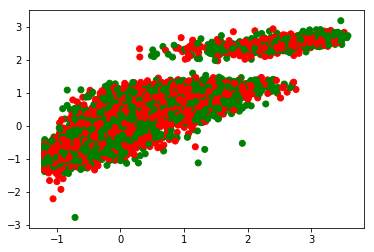

In [38]:
colors = ("red", "green")
plt.scatter(y_test,prediction,cmap="virdis",c=colors)

In [39]:
# mae_sum = 0
# for X_test, x in zip(X_test, y_test):
#     prediction = mod_LR.predict(y_test)
#     mae_sum += abs(X_test - prediction)
# mae = mae_sum / len(X_test)
# print(mae)

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


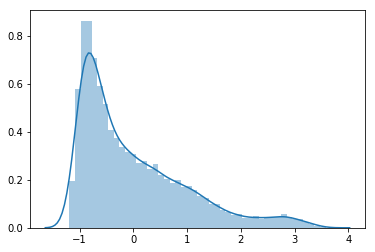

In [40]:
sns.distplot(y_test)

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


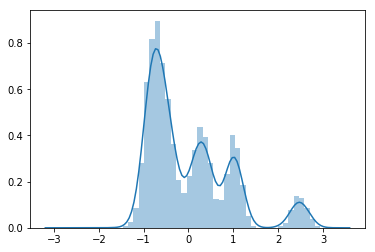

In [41]:
sns.distplot(prediction)

In [42]:
mod_Lasso = LassoCV(n_jobs=-1,cv=10)

In [43]:
mod_Lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [44]:
#X_test = map(float(),X_test)

prediction = mod_Lasso.predict(X_test)

In [45]:
mae = mean_absolute_error(y_test,prediction)
print(mae)

0.2741416389272732


In [46]:
mae = mean_squared_error(y_test,prediction)
print(mae)

0.13885685727156427


In [47]:
rsqr = r2_score(y_test,prediction)
print(rsqr)

0.8594547295480165


In [48]:
alpha = [0.001, 0.0001, 0.002, 0.02, 0.01, 0.1, 0.5]   
for alphas in alpha:    
    mod_Elastic = ElasticNet(alpha=alphas)
    mod_Elastic.fit(X_train,y_train)
    prediction = mod_Lasso.predict(X_test)
    mae = mean_absolute_error(y_test,prediction)
    print(mae)
    mae = mean_squared_error(y_test,prediction)
    print(mae)
    rsqr = r2_score(y_test,prediction)
    print(rsqr)
    print("-------------------------------------------------------")

0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------


C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------
0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------
0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------
0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------
0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------
0.2741416389272732
0.13885685727156427
0.8594547295480165
-------------------------------------------------------


In [49]:
#y_test.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [50]:
from lightgbm import LGBMRegressor

In [70]:
model = LGBMRegressor(learning_rate=8e-2, n_estimators=3000).fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae')


[1]	valid_0's l1: 0.740811	valid_0's l2: 0.856491
[2]	valid_0's l1: 0.690394	valid_0's l2: 0.74491
[3]	valid_0's l1: 0.644758	valid_0's l2: 0.650301
[4]	valid_0's l1: 0.603302	valid_0's l2: 0.569951
[5]	valid_0's l1: 0.5657	valid_0's l2: 0.501746
[6]	valid_0's l1: 0.53188	valid_0's l2: 0.444022
[7]	valid_0's l1: 0.501147	valid_0's l2: 0.394705
[8]	valid_0's l1: 0.473711	valid_0's l2: 0.352967
[9]	valid_0's l1: 0.448968	valid_0's l2: 0.317251
[10]	valid_0's l1: 0.426906	valid_0's l2: 0.286909
[11]	valid_0's l1: 0.407064	valid_0's l2: 0.260896
[12]	valid_0's l1: 0.389019	valid_0's l2: 0.238714
[13]	valid_0's l1: 0.372703	valid_0's l2: 0.219477
[14]	valid_0's l1: 0.358378	valid_0's l2: 0.203508
[15]	valid_0's l1: 0.344893	valid_0's l2: 0.18926
[16]	valid_0's l1: 0.33326	valid_0's l2: 0.177372
[17]	valid_0's l1: 0.322579	valid_0's l2: 0.166908
[18]	valid_0's l1: 0.313146	valid_0's l2: 0.157996
[19]	valid_0's l1: 0.304407	valid_0's l2: 0.150297
[20]	valid_0's l1: 0.2966	valid_0's l2: 0.1434

[176]	valid_0's l1: 0.17567	valid_0's l2: 0.0579362
[177]	valid_0's l1: 0.175522	valid_0's l2: 0.0578464
[178]	valid_0's l1: 0.175359	valid_0's l2: 0.0577534
[179]	valid_0's l1: 0.175277	valid_0's l2: 0.0576941
[180]	valid_0's l1: 0.175157	valid_0's l2: 0.057624
[181]	valid_0's l1: 0.175028	valid_0's l2: 0.0575447
[182]	valid_0's l1: 0.174968	valid_0's l2: 0.0575036
[183]	valid_0's l1: 0.174945	valid_0's l2: 0.0574874
[184]	valid_0's l1: 0.174836	valid_0's l2: 0.0574142
[185]	valid_0's l1: 0.174785	valid_0's l2: 0.057374
[186]	valid_0's l1: 0.174735	valid_0's l2: 0.0573377
[187]	valid_0's l1: 0.174611	valid_0's l2: 0.057268
[188]	valid_0's l1: 0.174514	valid_0's l2: 0.0572108
[189]	valid_0's l1: 0.174387	valid_0's l2: 0.057137
[190]	valid_0's l1: 0.174267	valid_0's l2: 0.0570826
[191]	valid_0's l1: 0.174186	valid_0's l2: 0.0570335
[192]	valid_0's l1: 0.174023	valid_0's l2: 0.0569463
[193]	valid_0's l1: 0.173891	valid_0's l2: 0.0568654
[194]	valid_0's l1: 0.173797	valid_0's l2: 0.056800

[354]	valid_0's l1: 0.16508	valid_0's l2: 0.0517706
[355]	valid_0's l1: 0.165065	valid_0's l2: 0.0517591
[356]	valid_0's l1: 0.165022	valid_0's l2: 0.0517301
[357]	valid_0's l1: 0.164975	valid_0's l2: 0.0517021
[358]	valid_0's l1: 0.164984	valid_0's l2: 0.0517059
[359]	valid_0's l1: 0.164962	valid_0's l2: 0.051693
[360]	valid_0's l1: 0.164929	valid_0's l2: 0.0516786
[361]	valid_0's l1: 0.164901	valid_0's l2: 0.0516593
[362]	valid_0's l1: 0.164878	valid_0's l2: 0.0516498
[363]	valid_0's l1: 0.164853	valid_0's l2: 0.0516343
[364]	valid_0's l1: 0.164845	valid_0's l2: 0.0516266
[365]	valid_0's l1: 0.164819	valid_0's l2: 0.0516123
[366]	valid_0's l1: 0.16475	valid_0's l2: 0.0515809
[367]	valid_0's l1: 0.16475	valid_0's l2: 0.0515732
[368]	valid_0's l1: 0.164753	valid_0's l2: 0.0515773
[369]	valid_0's l1: 0.164679	valid_0's l2: 0.0515363
[370]	valid_0's l1: 0.164633	valid_0's l2: 0.0515187
[371]	valid_0's l1: 0.164624	valid_0's l2: 0.0515168
[372]	valid_0's l1: 0.164591	valid_0's l2: 0.05149

[539]	valid_0's l1: 0.160648	valid_0's l2: 0.0492695
[540]	valid_0's l1: 0.160634	valid_0's l2: 0.0492614
[541]	valid_0's l1: 0.160629	valid_0's l2: 0.0492598
[542]	valid_0's l1: 0.160624	valid_0's l2: 0.0492579
[543]	valid_0's l1: 0.160612	valid_0's l2: 0.0492463
[544]	valid_0's l1: 0.160576	valid_0's l2: 0.0492286
[545]	valid_0's l1: 0.160559	valid_0's l2: 0.0492205
[546]	valid_0's l1: 0.160543	valid_0's l2: 0.0492082
[547]	valid_0's l1: 0.160526	valid_0's l2: 0.0492021
[548]	valid_0's l1: 0.16049	valid_0's l2: 0.0491821
[549]	valid_0's l1: 0.160471	valid_0's l2: 0.0491716
[550]	valid_0's l1: 0.160428	valid_0's l2: 0.0491477
[551]	valid_0's l1: 0.160421	valid_0's l2: 0.0491411
[552]	valid_0's l1: 0.160417	valid_0's l2: 0.0491355
[553]	valid_0's l1: 0.160369	valid_0's l2: 0.0491106
[554]	valid_0's l1: 0.160354	valid_0's l2: 0.0491054
[555]	valid_0's l1: 0.160335	valid_0's l2: 0.0490928
[556]	valid_0's l1: 0.160336	valid_0's l2: 0.0490997
[557]	valid_0's l1: 0.1603	valid_0's l2: 0.0490

[714]	valid_0's l1: 0.156924	valid_0's l2: 0.0473004
[715]	valid_0's l1: 0.156898	valid_0's l2: 0.0472919
[716]	valid_0's l1: 0.156877	valid_0's l2: 0.0472804
[717]	valid_0's l1: 0.156845	valid_0's l2: 0.047266
[718]	valid_0's l1: 0.156842	valid_0's l2: 0.0472649
[719]	valid_0's l1: 0.156826	valid_0's l2: 0.0472609
[720]	valid_0's l1: 0.156827	valid_0's l2: 0.0472606
[721]	valid_0's l1: 0.156822	valid_0's l2: 0.0472594
[722]	valid_0's l1: 0.156806	valid_0's l2: 0.0472528
[723]	valid_0's l1: 0.156786	valid_0's l2: 0.0472468
[724]	valid_0's l1: 0.15677	valid_0's l2: 0.0472369
[725]	valid_0's l1: 0.15677	valid_0's l2: 0.0472341
[726]	valid_0's l1: 0.15674	valid_0's l2: 0.0472257
[727]	valid_0's l1: 0.156709	valid_0's l2: 0.0472166
[728]	valid_0's l1: 0.156707	valid_0's l2: 0.0472114
[729]	valid_0's l1: 0.156687	valid_0's l2: 0.0472066
[730]	valid_0's l1: 0.15668	valid_0's l2: 0.0472021
[731]	valid_0's l1: 0.15663	valid_0's l2: 0.0471756
[732]	valid_0's l1: 0.156619	valid_0's l2: 0.0471678

[871]	valid_0's l1: 0.154899	valid_0's l2: 0.0462887
[872]	valid_0's l1: 0.1549	valid_0's l2: 0.0462914
[873]	valid_0's l1: 0.154904	valid_0's l2: 0.046288
[874]	valid_0's l1: 0.154893	valid_0's l2: 0.0462821
[875]	valid_0's l1: 0.154891	valid_0's l2: 0.0462807
[876]	valid_0's l1: 0.154878	valid_0's l2: 0.0462786
[877]	valid_0's l1: 0.154867	valid_0's l2: 0.0462727
[878]	valid_0's l1: 0.154852	valid_0's l2: 0.046266
[879]	valid_0's l1: 0.154833	valid_0's l2: 0.0462514
[880]	valid_0's l1: 0.154831	valid_0's l2: 0.0462501
[881]	valid_0's l1: 0.15482	valid_0's l2: 0.0462447
[882]	valid_0's l1: 0.154811	valid_0's l2: 0.0462355
[883]	valid_0's l1: 0.154821	valid_0's l2: 0.0462362
[884]	valid_0's l1: 0.154824	valid_0's l2: 0.0462395
[885]	valid_0's l1: 0.154816	valid_0's l2: 0.0462404
[886]	valid_0's l1: 0.154783	valid_0's l2: 0.0462242
[887]	valid_0's l1: 0.154765	valid_0's l2: 0.0462163
[888]	valid_0's l1: 0.154761	valid_0's l2: 0.0462147
[889]	valid_0's l1: 0.154765	valid_0's l2: 0.046214

[1043]	valid_0's l1: 0.153526	valid_0's l2: 0.045629
[1044]	valid_0's l1: 0.15352	valid_0's l2: 0.0456299
[1045]	valid_0's l1: 0.15352	valid_0's l2: 0.0456312
[1046]	valid_0's l1: 0.153513	valid_0's l2: 0.0456249
[1047]	valid_0's l1: 0.153504	valid_0's l2: 0.0456174
[1048]	valid_0's l1: 0.153495	valid_0's l2: 0.0456154
[1049]	valid_0's l1: 0.153486	valid_0's l2: 0.0456104
[1050]	valid_0's l1: 0.153494	valid_0's l2: 0.0456129
[1051]	valid_0's l1: 0.153492	valid_0's l2: 0.0456143
[1052]	valid_0's l1: 0.153491	valid_0's l2: 0.0456142
[1053]	valid_0's l1: 0.153479	valid_0's l2: 0.0456064
[1054]	valid_0's l1: 0.153457	valid_0's l2: 0.0455962
[1055]	valid_0's l1: 0.153456	valid_0's l2: 0.0455964
[1056]	valid_0's l1: 0.153439	valid_0's l2: 0.0455897
[1057]	valid_0's l1: 0.153419	valid_0's l2: 0.045582
[1058]	valid_0's l1: 0.153399	valid_0's l2: 0.045572
[1059]	valid_0's l1: 0.153393	valid_0's l2: 0.0455675
[1060]	valid_0's l1: 0.15339	valid_0's l2: 0.0455663
[1061]	valid_0's l1: 0.153382	vali

[1195]	valid_0's l1: 0.152586	valid_0's l2: 0.0451239
[1196]	valid_0's l1: 0.152564	valid_0's l2: 0.0451123
[1197]	valid_0's l1: 0.152565	valid_0's l2: 0.0451146
[1198]	valid_0's l1: 0.152552	valid_0's l2: 0.0451051
[1199]	valid_0's l1: 0.152546	valid_0's l2: 0.0450991
[1200]	valid_0's l1: 0.15253	valid_0's l2: 0.0450876
[1201]	valid_0's l1: 0.152534	valid_0's l2: 0.0450899
[1202]	valid_0's l1: 0.152523	valid_0's l2: 0.045087
[1203]	valid_0's l1: 0.152529	valid_0's l2: 0.0450902
[1204]	valid_0's l1: 0.152536	valid_0's l2: 0.0450946
[1205]	valid_0's l1: 0.152535	valid_0's l2: 0.0450952
[1206]	valid_0's l1: 0.15252	valid_0's l2: 0.0450851
[1207]	valid_0's l1: 0.152521	valid_0's l2: 0.0450869
[1208]	valid_0's l1: 0.152506	valid_0's l2: 0.0450784
[1209]	valid_0's l1: 0.152514	valid_0's l2: 0.0450804
[1210]	valid_0's l1: 0.15251	valid_0's l2: 0.0450794
[1211]	valid_0's l1: 0.152508	valid_0's l2: 0.0450761
[1212]	valid_0's l1: 0.15251	valid_0's l2: 0.0450774
[1213]	valid_0's l1: 0.152509	val

[1349]	valid_0's l1: 0.151945	valid_0's l2: 0.0447868
[1350]	valid_0's l1: 0.151939	valid_0's l2: 0.044784
[1351]	valid_0's l1: 0.15193	valid_0's l2: 0.0447804
[1352]	valid_0's l1: 0.151927	valid_0's l2: 0.0447824
[1353]	valid_0's l1: 0.151922	valid_0's l2: 0.0447816
[1354]	valid_0's l1: 0.151913	valid_0's l2: 0.0447785
[1355]	valid_0's l1: 0.1519	valid_0's l2: 0.0447715
[1356]	valid_0's l1: 0.151892	valid_0's l2: 0.0447676
[1357]	valid_0's l1: 0.151898	valid_0's l2: 0.0447704
[1358]	valid_0's l1: 0.151895	valid_0's l2: 0.0447703
[1359]	valid_0's l1: 0.151889	valid_0's l2: 0.0447662
[1360]	valid_0's l1: 0.151889	valid_0's l2: 0.0447648
[1361]	valid_0's l1: 0.15188	valid_0's l2: 0.0447614
[1362]	valid_0's l1: 0.151872	valid_0's l2: 0.0447583
[1363]	valid_0's l1: 0.15187	valid_0's l2: 0.0447555
[1364]	valid_0's l1: 0.151862	valid_0's l2: 0.0447466
[1365]	valid_0's l1: 0.151841	valid_0's l2: 0.0447388
[1366]	valid_0's l1: 0.15184	valid_0's l2: 0.0447402
[1367]	valid_0's l1: 0.151845	valid

[1506]	valid_0's l1: 0.151459	valid_0's l2: 0.0445859
[1507]	valid_0's l1: 0.151458	valid_0's l2: 0.0445861
[1508]	valid_0's l1: 0.151453	valid_0's l2: 0.0445837
[1509]	valid_0's l1: 0.151446	valid_0's l2: 0.0445812
[1510]	valid_0's l1: 0.151432	valid_0's l2: 0.0445733
[1511]	valid_0's l1: 0.151429	valid_0's l2: 0.0445741
[1512]	valid_0's l1: 0.151423	valid_0's l2: 0.0445708
[1513]	valid_0's l1: 0.151426	valid_0's l2: 0.0445707
[1514]	valid_0's l1: 0.151426	valid_0's l2: 0.0445699
[1515]	valid_0's l1: 0.151419	valid_0's l2: 0.0445673
[1516]	valid_0's l1: 0.15143	valid_0's l2: 0.0445671
[1517]	valid_0's l1: 0.151423	valid_0's l2: 0.0445661
[1518]	valid_0's l1: 0.151418	valid_0's l2: 0.0445639
[1519]	valid_0's l1: 0.151417	valid_0's l2: 0.0445646
[1520]	valid_0's l1: 0.151422	valid_0's l2: 0.044567
[1521]	valid_0's l1: 0.151411	valid_0's l2: 0.0445621
[1522]	valid_0's l1: 0.151398	valid_0's l2: 0.0445594
[1523]	valid_0's l1: 0.151399	valid_0's l2: 0.0445608
[1524]	valid_0's l1: 0.151399	

[1665]	valid_0's l1: 0.150933	valid_0's l2: 0.0443515
[1666]	valid_0's l1: 0.150932	valid_0's l2: 0.0443515
[1667]	valid_0's l1: 0.150915	valid_0's l2: 0.0443432
[1668]	valid_0's l1: 0.150919	valid_0's l2: 0.0443443
[1669]	valid_0's l1: 0.150922	valid_0's l2: 0.044345
[1670]	valid_0's l1: 0.150899	valid_0's l2: 0.0443348
[1671]	valid_0's l1: 0.150894	valid_0's l2: 0.0443354
[1672]	valid_0's l1: 0.150891	valid_0's l2: 0.0443346
[1673]	valid_0's l1: 0.150883	valid_0's l2: 0.0443309
[1674]	valid_0's l1: 0.150884	valid_0's l2: 0.0443314
[1675]	valid_0's l1: 0.150876	valid_0's l2: 0.0443245
[1676]	valid_0's l1: 0.150873	valid_0's l2: 0.0443243
[1677]	valid_0's l1: 0.150869	valid_0's l2: 0.0443236
[1678]	valid_0's l1: 0.150861	valid_0's l2: 0.0443187
[1679]	valid_0's l1: 0.150868	valid_0's l2: 0.0443213
[1680]	valid_0's l1: 0.150874	valid_0's l2: 0.0443234
[1681]	valid_0's l1: 0.15088	valid_0's l2: 0.044326
[1682]	valid_0's l1: 0.150878	valid_0's l2: 0.0443236
[1683]	valid_0's l1: 0.150873	v

[1848]	valid_0's l1: 0.150443	valid_0's l2: 0.0441589
[1849]	valid_0's l1: 0.150438	valid_0's l2: 0.0441582
[1850]	valid_0's l1: 0.150438	valid_0's l2: 0.0441578
[1851]	valid_0's l1: 0.150431	valid_0's l2: 0.0441561
[1852]	valid_0's l1: 0.15043	valid_0's l2: 0.0441542
[1853]	valid_0's l1: 0.150421	valid_0's l2: 0.0441475
[1854]	valid_0's l1: 0.150413	valid_0's l2: 0.0441425
[1855]	valid_0's l1: 0.15042	valid_0's l2: 0.0441498
[1856]	valid_0's l1: 0.150412	valid_0's l2: 0.0441466
[1857]	valid_0's l1: 0.150407	valid_0's l2: 0.0441434
[1858]	valid_0's l1: 0.150405	valid_0's l2: 0.0441423
[1859]	valid_0's l1: 0.150399	valid_0's l2: 0.0441402
[1860]	valid_0's l1: 0.150399	valid_0's l2: 0.044143
[1861]	valid_0's l1: 0.150396	valid_0's l2: 0.0441442
[1862]	valid_0's l1: 0.150396	valid_0's l2: 0.0441451
[1863]	valid_0's l1: 0.150398	valid_0's l2: 0.044147
[1864]	valid_0's l1: 0.150394	valid_0's l2: 0.0441448
[1865]	valid_0's l1: 0.150394	valid_0's l2: 0.044145
[1866]	valid_0's l1: 0.150387	val

[2009]	valid_0's l1: 0.150222	valid_0's l2: 0.0440801
[2010]	valid_0's l1: 0.150226	valid_0's l2: 0.0440822
[2011]	valid_0's l1: 0.150221	valid_0's l2: 0.04408
[2012]	valid_0's l1: 0.150225	valid_0's l2: 0.0440804
[2013]	valid_0's l1: 0.150223	valid_0's l2: 0.0440803
[2014]	valid_0's l1: 0.150221	valid_0's l2: 0.0440791
[2015]	valid_0's l1: 0.15022	valid_0's l2: 0.0440777
[2016]	valid_0's l1: 0.150213	valid_0's l2: 0.0440774
[2017]	valid_0's l1: 0.150206	valid_0's l2: 0.0440745
[2018]	valid_0's l1: 0.150206	valid_0's l2: 0.0440749
[2019]	valid_0's l1: 0.150201	valid_0's l2: 0.044074
[2020]	valid_0's l1: 0.150202	valid_0's l2: 0.0440744
[2021]	valid_0's l1: 0.150201	valid_0's l2: 0.044073
[2022]	valid_0's l1: 0.150203	valid_0's l2: 0.0440736
[2023]	valid_0's l1: 0.150199	valid_0's l2: 0.0440714
[2024]	valid_0's l1: 0.150203	valid_0's l2: 0.0440723
[2025]	valid_0's l1: 0.150194	valid_0's l2: 0.04407
[2026]	valid_0's l1: 0.150188	valid_0's l2: 0.0440658
[2027]	valid_0's l1: 0.150198	valid

[2166]	valid_0's l1: 0.149855	valid_0's l2: 0.0439764
[2167]	valid_0's l1: 0.149854	valid_0's l2: 0.0439768
[2168]	valid_0's l1: 0.149858	valid_0's l2: 0.0439808
[2169]	valid_0's l1: 0.149857	valid_0's l2: 0.0439818
[2170]	valid_0's l1: 0.149856	valid_0's l2: 0.0439803
[2171]	valid_0's l1: 0.14986	valid_0's l2: 0.0439837
[2172]	valid_0's l1: 0.149868	valid_0's l2: 0.0439871
[2173]	valid_0's l1: 0.14987	valid_0's l2: 0.0439884
[2174]	valid_0's l1: 0.149873	valid_0's l2: 0.0439898
[2175]	valid_0's l1: 0.149861	valid_0's l2: 0.0439865
[2176]	valid_0's l1: 0.149845	valid_0's l2: 0.043979
[2177]	valid_0's l1: 0.149844	valid_0's l2: 0.0439801
[2178]	valid_0's l1: 0.149848	valid_0's l2: 0.0439813
[2179]	valid_0's l1: 0.149844	valid_0's l2: 0.0439812
[2180]	valid_0's l1: 0.149834	valid_0's l2: 0.0439781
[2181]	valid_0's l1: 0.149838	valid_0's l2: 0.0439796
[2182]	valid_0's l1: 0.149832	valid_0's l2: 0.0439784
[2183]	valid_0's l1: 0.149836	valid_0's l2: 0.0439777
[2184]	valid_0's l1: 0.149828	v

[2323]	valid_0's l1: 0.149564	valid_0's l2: 0.0438399
[2324]	valid_0's l1: 0.149561	valid_0's l2: 0.0438393
[2325]	valid_0's l1: 0.149543	valid_0's l2: 0.0438305
[2326]	valid_0's l1: 0.149543	valid_0's l2: 0.0438315
[2327]	valid_0's l1: 0.149545	valid_0's l2: 0.0438314
[2328]	valid_0's l1: 0.149545	valid_0's l2: 0.04383
[2329]	valid_0's l1: 0.14954	valid_0's l2: 0.0438274
[2330]	valid_0's l1: 0.149542	valid_0's l2: 0.0438274
[2331]	valid_0's l1: 0.149541	valid_0's l2: 0.0438252
[2332]	valid_0's l1: 0.149546	valid_0's l2: 0.0438275
[2333]	valid_0's l1: 0.149541	valid_0's l2: 0.0438271
[2334]	valid_0's l1: 0.149539	valid_0's l2: 0.0438283
[2335]	valid_0's l1: 0.149534	valid_0's l2: 0.0438241
[2336]	valid_0's l1: 0.149535	valid_0's l2: 0.0438261
[2337]	valid_0's l1: 0.149537	valid_0's l2: 0.0438261
[2338]	valid_0's l1: 0.149541	valid_0's l2: 0.0438281
[2339]	valid_0's l1: 0.149547	valid_0's l2: 0.0438285
[2340]	valid_0's l1: 0.149548	valid_0's l2: 0.0438272
[2341]	valid_0's l1: 0.149545	v

[2479]	valid_0's l1: 0.149364	valid_0's l2: 0.0437447
[2480]	valid_0's l1: 0.149359	valid_0's l2: 0.0437421
[2481]	valid_0's l1: 0.149365	valid_0's l2: 0.0437447
[2482]	valid_0's l1: 0.149363	valid_0's l2: 0.0437425
[2483]	valid_0's l1: 0.149366	valid_0's l2: 0.0437447
[2484]	valid_0's l1: 0.149357	valid_0's l2: 0.0437379
[2485]	valid_0's l1: 0.149366	valid_0's l2: 0.0437406
[2486]	valid_0's l1: 0.149368	valid_0's l2: 0.0437405
[2487]	valid_0's l1: 0.149373	valid_0's l2: 0.0437435
[2488]	valid_0's l1: 0.149375	valid_0's l2: 0.043744
[2489]	valid_0's l1: 0.149374	valid_0's l2: 0.0437433
[2490]	valid_0's l1: 0.149368	valid_0's l2: 0.0437391
[2491]	valid_0's l1: 0.149357	valid_0's l2: 0.0437331
[2492]	valid_0's l1: 0.149358	valid_0's l2: 0.0437344
[2493]	valid_0's l1: 0.149362	valid_0's l2: 0.0437346
[2494]	valid_0's l1: 0.149354	valid_0's l2: 0.0437303
[2495]	valid_0's l1: 0.149356	valid_0's l2: 0.0437315
[2496]	valid_0's l1: 0.149357	valid_0's l2: 0.0437318
[2497]	valid_0's l1: 0.14936	

[2655]	valid_0's l1: 0.14912	valid_0's l2: 0.04368
[2656]	valid_0's l1: 0.149129	valid_0's l2: 0.0436827
[2657]	valid_0's l1: 0.149127	valid_0's l2: 0.0436819
[2658]	valid_0's l1: 0.149129	valid_0's l2: 0.0436819
[2659]	valid_0's l1: 0.149121	valid_0's l2: 0.0436755
[2660]	valid_0's l1: 0.149121	valid_0's l2: 0.0436748
[2661]	valid_0's l1: 0.149119	valid_0's l2: 0.0436729
[2662]	valid_0's l1: 0.14912	valid_0's l2: 0.0436736
[2663]	valid_0's l1: 0.149124	valid_0's l2: 0.0436756
[2664]	valid_0's l1: 0.149124	valid_0's l2: 0.0436749
[2665]	valid_0's l1: 0.14912	valid_0's l2: 0.0436731
[2666]	valid_0's l1: 0.149116	valid_0's l2: 0.0436716
[2667]	valid_0's l1: 0.149117	valid_0's l2: 0.0436721
[2668]	valid_0's l1: 0.149119	valid_0's l2: 0.0436729
[2669]	valid_0's l1: 0.149119	valid_0's l2: 0.043673
[2670]	valid_0's l1: 0.149117	valid_0's l2: 0.0436719
[2671]	valid_0's l1: 0.149117	valid_0's l2: 0.0436719
[2672]	valid_0's l1: 0.149124	valid_0's l2: 0.0436745
[2673]	valid_0's l1: 0.149123	vali

[2810]	valid_0's l1: 0.149093	valid_0's l2: 0.0436986
[2811]	valid_0's l1: 0.149091	valid_0's l2: 0.0436967
[2812]	valid_0's l1: 0.149091	valid_0's l2: 0.0436963
[2813]	valid_0's l1: 0.14909	valid_0's l2: 0.0436953
[2814]	valid_0's l1: 0.149083	valid_0's l2: 0.0436945
[2815]	valid_0's l1: 0.149084	valid_0's l2: 0.0436934
[2816]	valid_0's l1: 0.14909	valid_0's l2: 0.0436932
[2817]	valid_0's l1: 0.149082	valid_0's l2: 0.0436905
[2818]	valid_0's l1: 0.149083	valid_0's l2: 0.0436899
[2819]	valid_0's l1: 0.149091	valid_0's l2: 0.0436898
[2820]	valid_0's l1: 0.149088	valid_0's l2: 0.0436893
[2821]	valid_0's l1: 0.149085	valid_0's l2: 0.043687
[2822]	valid_0's l1: 0.149086	valid_0's l2: 0.0436876
[2823]	valid_0's l1: 0.149083	valid_0's l2: 0.0436858
[2824]	valid_0's l1: 0.149085	valid_0's l2: 0.0436878
[2825]	valid_0's l1: 0.149088	valid_0's l2: 0.0436882
[2826]	valid_0's l1: 0.149092	valid_0's l2: 0.0436886
[2827]	valid_0's l1: 0.149093	valid_0's l2: 0.0436884
[2828]	valid_0's l1: 0.14909	va

[2987]	valid_0's l1: 0.149039	valid_0's l2: 0.0436852
[2988]	valid_0's l1: 0.149041	valid_0's l2: 0.0436857
[2989]	valid_0's l1: 0.149042	valid_0's l2: 0.0436883
[2990]	valid_0's l1: 0.149034	valid_0's l2: 0.043685
[2991]	valid_0's l1: 0.149033	valid_0's l2: 0.0436857
[2992]	valid_0's l1: 0.149032	valid_0's l2: 0.0436844
[2993]	valid_0's l1: 0.149032	valid_0's l2: 0.0436862
[2994]	valid_0's l1: 0.149033	valid_0's l2: 0.0436866
[2995]	valid_0's l1: 0.14903	valid_0's l2: 0.043686
[2996]	valid_0's l1: 0.149029	valid_0's l2: 0.0436855
[2997]	valid_0's l1: 0.149027	valid_0's l2: 0.0436862
[2998]	valid_0's l1: 0.149022	valid_0's l2: 0.0436837
[2999]	valid_0's l1: 0.149022	valid_0's l2: 0.0436845
[3000]	valid_0's l1: 0.149022	valid_0's l2: 0.0436845


In [71]:
predict = model.predict(X_test)

In [72]:
mae = mean_absolute_error(y_test,predict)

In [73]:
print(mae)

0.1490222289232237


In [74]:
mse = mean_squared_error(y_test,predict)
print(mse)

0.04368453650657658


In [75]:
import math
rmse = math.sqrt(mean_squared_error(y_test,predict))
print(rmse)

0.2090084603708103


In [76]:
print(math.sqrt(0.1388569922998652))

0.37263520002794315


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(n_estimators=300, n_jobs=-1,learning_rate=8e-2)

In [ ]:
model_xgb.fit(X_train,y_train)

In [ ]:
predict = model.predict(X_test)

In [ ]:
mod_LCV = LassoCV( n_jobs=1,cv=10,n_alphas)

In [ ]:
# def impute_geoloc(cols):
#     #print(cols)
#     #cols.strip()
#     cols=cols.str.replace("(","")
#     cols=cols.str.replace(")","")
#     col = cols.split(",")
#     #print(str(col[0]))
#     x_loc =float(str(col[0]))
#     y_loc =float(str(col[1]))
#     #print("vvvvv,",x_loc,y_loc)
#     return x_loc,y_loc